Steps to do for ML project
1. Understand the problem statement
2. Data Ingestion
3. Explore the dataset
4. Data preprocessing
5. Model training
6. Choose best model
7. Deploy
8. Monitor

For this project, I am going to explore the dataset of student performance and solve the problem. In this project, I dive deep into dataset to find out student performance, based on which features performance got afftected majorily.

### Import Data and required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Save dataset under data directory and use pd to fetch the dataset.

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
# head() gives datails about the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Check missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

If there are any misssing values, use imputation to fill the data. For numberical fetures, use mean. For categorical features, use mode.

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Check duplicates

In [20]:
df.duplicated().sum()


np.int64(0)

Check Data types

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Check number of unique values in each column

In [22]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [23]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight:
from above description of numerical data, all means are close to each other between 66 and 68.05.
All standard deviation are close betweeen 14.6 and 15.19.
while there is a minimum score 0 for math and for reading is much higher = 17 and for wriitng is higher = 10.

In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print(f"Categories in 'gender' variable: {df['gender'].unique()}")
print(f"Categories in 'race/ethnicity' variable: {df['race/ethnicity'].unique()}")
print(f"Categories in 'parental level of education' variable: {df['parental level of education'].unique()}")
print(f"Categories in 'lunch' variable: {df['lunch'].unique()}")
print(f"Categories in 'test preparation course' variable: {df['test preparation course'].unique()}")


Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [25]:
numerical_features = [ feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [ feature for feature in df.columns if df[feature].dtype == 'O']

print(f"number of numerical features: {len(numerical_features)}, and there are {numerical_features}")
print(f"number of categorical features: {len(categorical_features)}- {categorical_features}")


number of numerical features: 3, and there are ['math score', 'reading score', 'writing score']
number of categorical features: 5- ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Adding columns 'Total Score' and 'Average'

In [18]:
df['total score'] = df['math score']+df['reading score']+df['writing score']
df['average'] = df['total score']/3

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,229,76.333333


In [21]:
number_students_scored_100_reading = df[df['reading score'] == 100]['average'].count()
number_students_scored_100_math = df[df['math score'] == 100]['average'].count()
number_students_scored_100_writing = df[df['writing score'] == 100]['average'].count()

print(f"Number of students scored full in math : {number_students_scored_100_math}")
print(f"Number of students scored full in reading : {number_students_scored_100_reading}")
print(f"Number of students scored full in writing : {number_students_scored_100_writing}")

Number of students scored full in math : 7
Number of students scored full in reading : 17
Number of students scored full in writing : 14


In [22]:
number_students_less_than_45_in_reading = df[df['reading score'] <= 45]['average'].count()
number_students_less_than_45_in_math = df[df['math score'] <= 45]['average'].count()
number_students_less_than_45_in_writing = df[df['writing score'] <= 45]['average'].count()

print(f"Number of students scored less than 45 in math : {number_students_less_than_45_in_math}")
print(f"Number of students scored less than 45 in reading : {number_students_less_than_45_in_reading}")
print(f"Number of students scored less than 45 in writing : {number_students_less_than_45_in_writing}")

Number of students scored less than 45 in math : 85
Number of students scored less than 45 in reading : 60
Number of students scored less than 45 in writing : 77


From above results, there are many students got less marks in Math.

### Exploring Data

## Histogram

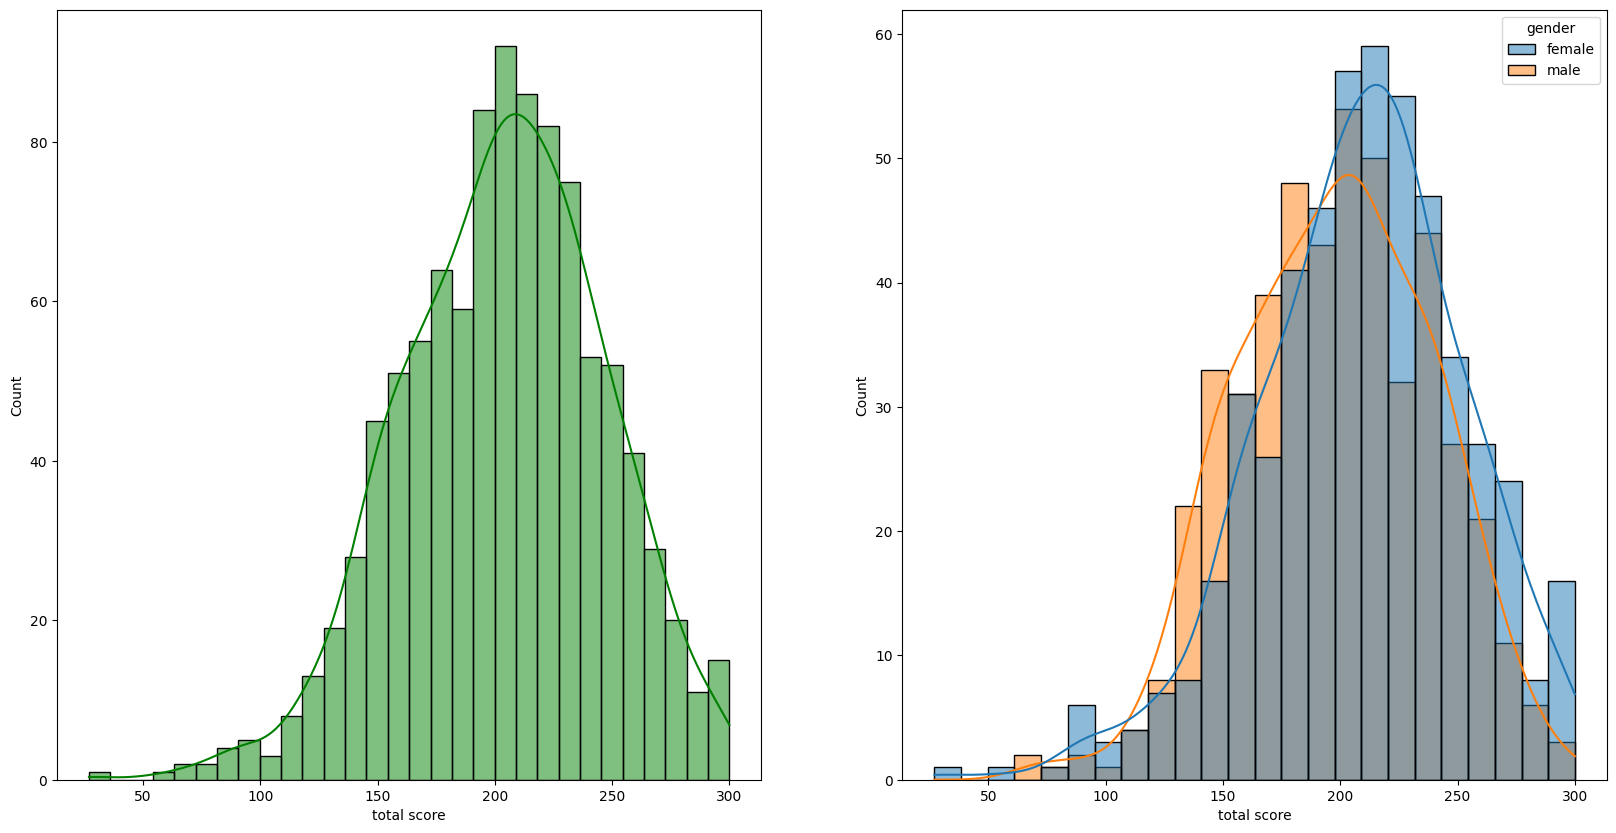

In [30]:
fig, axs = plt.subplots(1,2, figsize = (20,10))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue="gender")
plt.show()

plot shows that female peroformed well than male.